In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [131]:
df = pd.read_csv("../dataset/dataset_with_error.csv")

df

,Unnamed: 0,Point A,Point B,Point C,Point D,Point E,Error Classification
0,0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...,...
306,306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [132]:
df = df.drop('Unnamed: 0', axis=1)
df

,Point A,Point B,Point C,Point D,Point E,Error Classification
0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...
306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [133]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df.drop('Error Classification',axis=1)

y = df['Error Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [134]:
knn7 = KNeighborsClassifier(n_neighbors = 7)


In [135]:
knn7.fit(X_train, y_train)


y_pred_7 = knn7.predict(X_test)


In [136]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=7", accuracy_score(y_test, y_pred_7)*100)

Accuracy with k=7 94.68085106382979


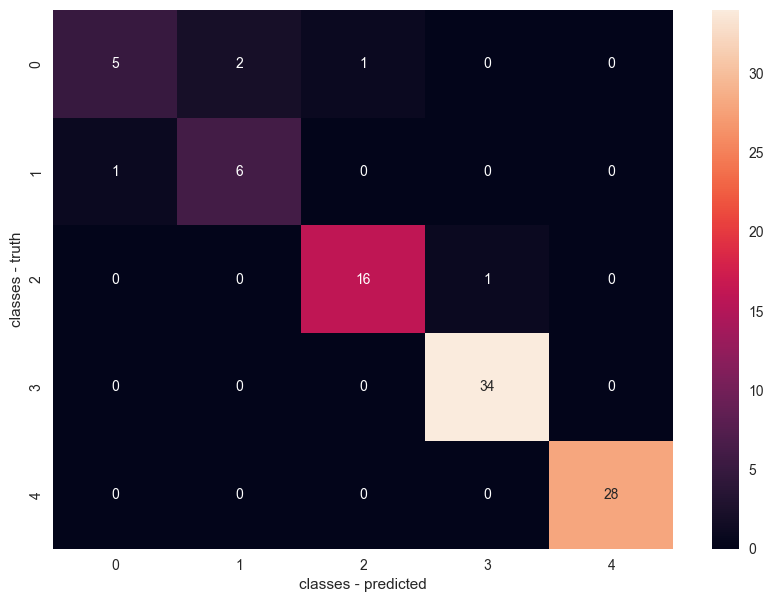

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_pred_7)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('classes - predicted')
plt.ylabel('classes - truth')
plt.show()

Minimum error:- 0.0425531914893617 at K = 6


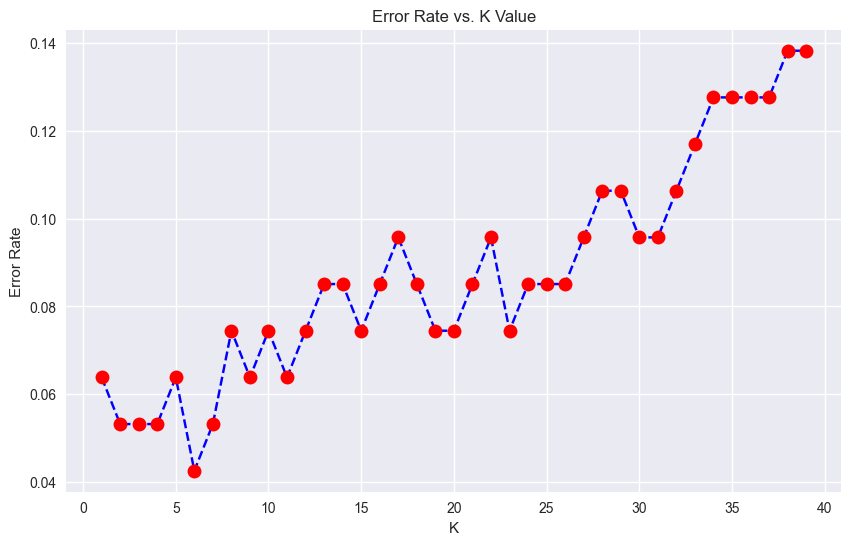

In [138]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.9574468085106383 at K = 6


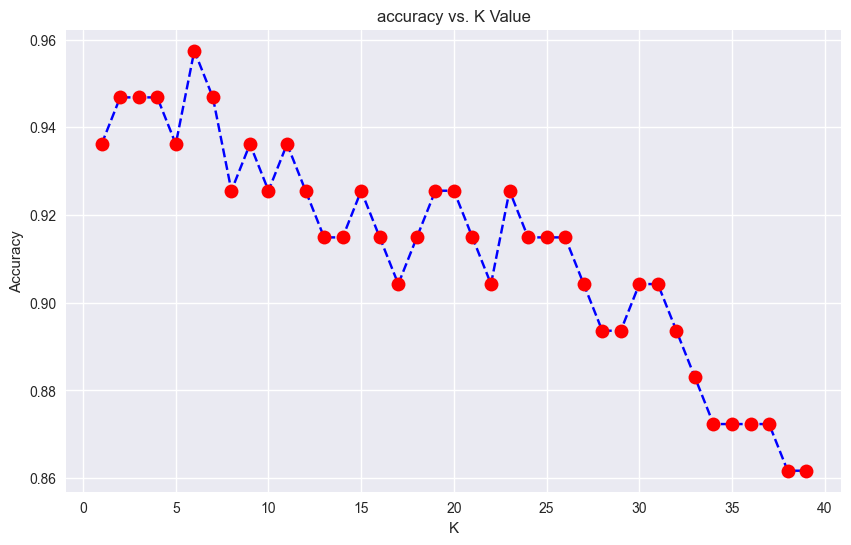

In [139]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [140]:
knn_best = KNeighborsClassifier(n_neighbors=6)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)


In [141]:
from sklearn.metrics import accuracy_score
print("Accuracy with best k =6" ,"is ", accuracy_score(y_test, y_pred_best)*100)

Accuracy with best k =6 is  95.74468085106383


## Accuracy 

In [145]:
print("Accuracy is: ",accuracy_score(y_test, y_pred_best)*100)

Accuracy is:  95.74468085106383


## Precision

In [146]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_best, average="weighted")
print('Precision: ',precision)

Precision:  0.9588905775075988


## Recall

In [147]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_best, average="weighted")
print('Recall: ',recall)

Recall:  0.9574468085106383


## F1 Score

In [149]:
from sklearn.metrics import f1_score
f1_score = 2 * (precision * recall ) / (precision + recall)
print('F1 Score: ',f1_score)


F1 Score:  0.9581681491411829


In [142]:
dfn = pd.read_csv("../dataset/validation_ds.csv")
df2 = pd.read_csv("../dataset/validation_ds.csv")
df2 = df2.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Error Classification', axis=1)
df2_pred = knn_best.predict(df2)
df2_pred


array(['B', 'E', 'A', 'A', 'E'], dtype=object)

In [143]:
score = accuracy_score(dfn['Error Classification'], df2_pred)
score

0.2